# seaborn
파이썬의 시각화 라이브러리로, Matplotlib를 기반으로 만들었으며 데이터 시각화를 더 쉽게 만들고, 복잡한 통계 그래프도 직관적으로 그릴 수 있다. <br>
Seaborn을 사용하면 데이터를 효과적으로 시각화하고 분석할 수 있다.

In [3]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 기본선 그래프


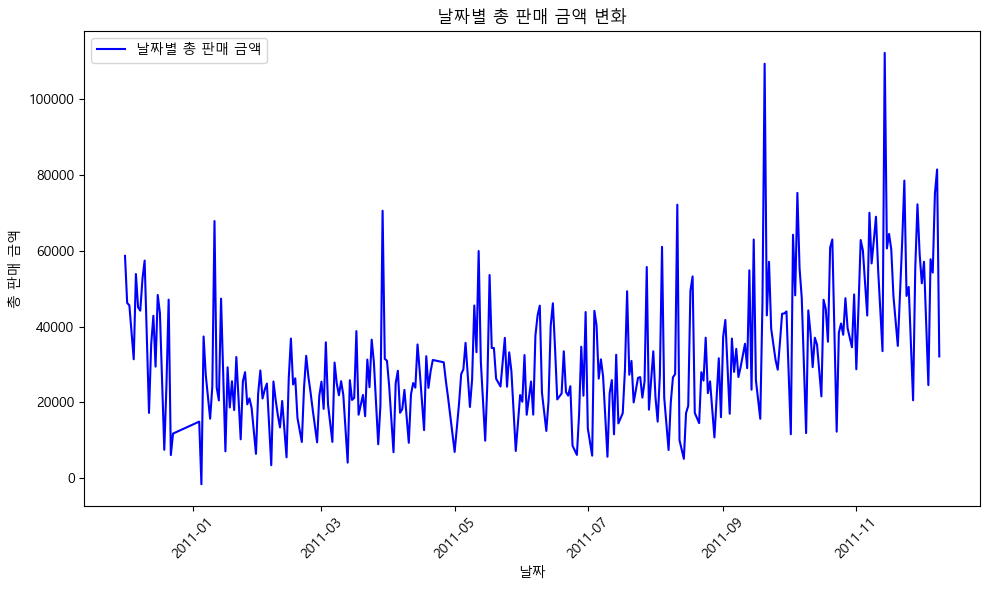

In [4]:
# 데이터 불러오기
ecommerce_df = pd.read_csv("../00_data/ecommerce_sales.csv", encoding="latin1")
# InvoiceDate 컬럼을 날짜 형식으로 변환
ecommerce_df["InvoiceDate"] = pd.to_datetime(ecommerce_df["InvoiceDate"])
# totalPrice 컬럼을 추가하고 수량과 가격 곱하기
ecommerce_df["TotalPrice"] = ecommerce_df["Quantity"] * ecommerce_df["UnitPrice"]

# ecommerce_df["InvoiceDate"].dt = 판다스의 날짜 관련 메서드를 사용할 수 있게 하는 속성이다.
# ecommerce_df["InvoiceDate"].dt.date = 해당 컬럼에서 날짜만 추출한다. (시간 정보 제거)
# ecommerce_df.groupby(ecommerce_df["InvoiceDate"].dt.date) 날짜를 기준으로 그룹화한다.
# ecommerce_df.groupby(ecommerce_df["InvoiceDate"].dt.date)["TotalPrice"].sum() = 동일한 날에 주문한 금액을 모두 합친다.
daily_sales = ecommerce_df.groupby(ecommerce_df["InvoiceDate"].dt.date)["TotalPrice"].sum()

plt.figure(figsize=(10,6))

# 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우 환경

# x = daily_sales의 index = 날짜
# y = daily_sales의 value = 값 
sns.lineplot(x=daily_sales.index, y=daily_sales.values, label="날짜별 총 판매 금액", color='blue')

plt.title("날짜별 총 판매 금액 변화")
plt.xlabel("날짜")
plt.ylabel("총 판매 금액")

# plot의 label을 표시하는 옵션
plt.legend()

# x축의 레이블을 45도 회전하여 가독성을 높힘
plt.xticks(rotation=45)

# 그래프의 요소들이 서로 겹치지 않도록 자동으로 조정한다.
plt.tight_layout()
plt.show()

## 막대형 그래프 그리기
막대 그래프(bar plot)은 카테고리 간의 비교를 시각화할 때 매우 유용하다.<br>
각 카테고리가 갖는 값을 막대 높이로 표현하여, 데이터를 직관적으로 비교할 수 있다.<br>

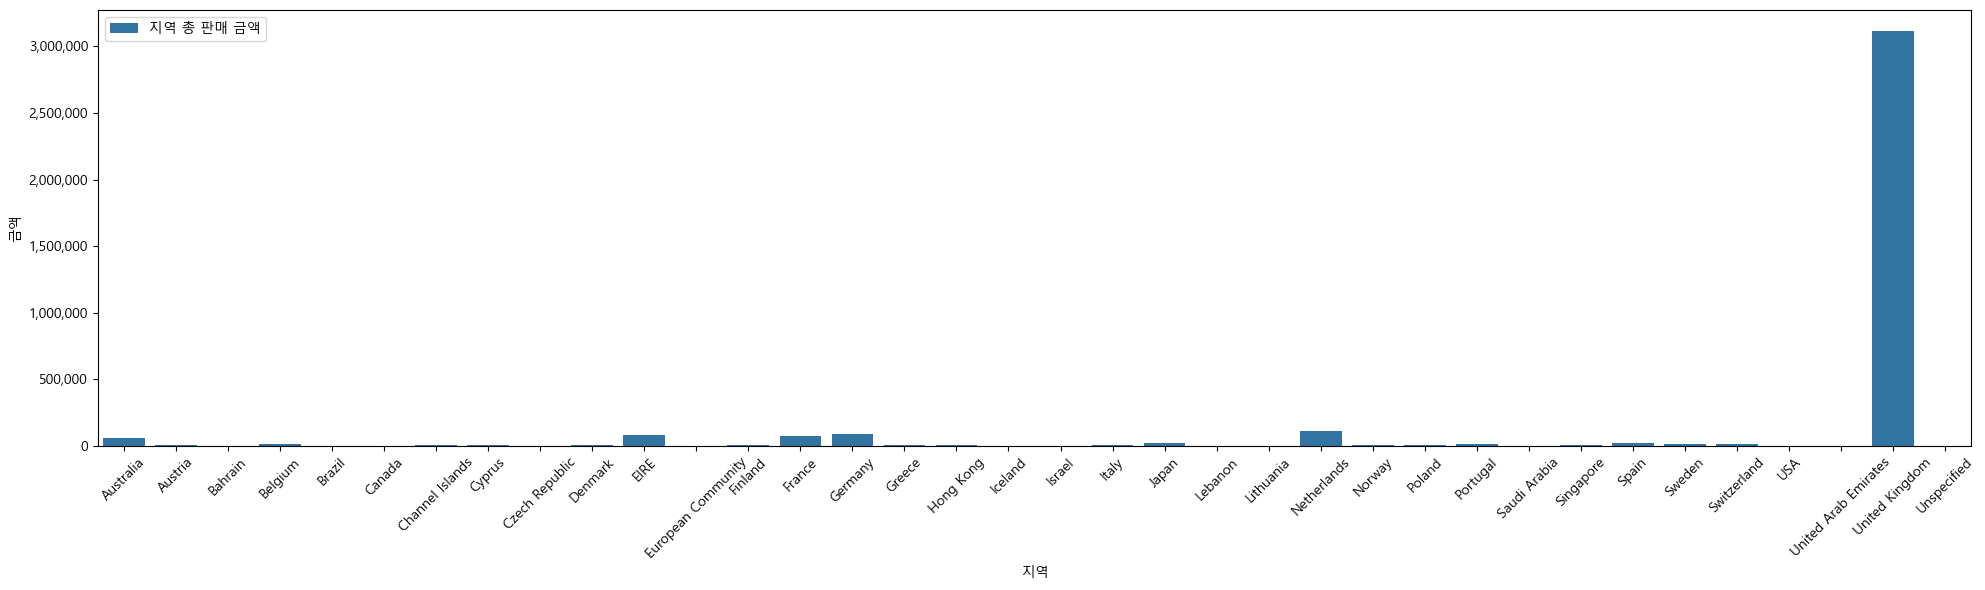

In [5]:
#축의 값 포맷을 사용자 정의 형식으로 지정하기 위해서 사용하는 도구이다.
from matplotlib.ticker import FuncFormatter

# CSV 파일 로드 및 날짜 형식 변환
ecommerce_df = pd.read_csv("../00_data/ecommerce_sales.csv", encoding="latin1")
ecommerce_df["InvoiceDate"] = pd.to_datetime(ecommerce_df["InvoiceDate"])

# 날짜 필터링
filtered_df = ecommerce_df[(ecommerce_df["InvoiceDate"] > "2010-12-01") & (ecommerce_df["InvoiceDate"] < "2011-06-01")].copy()

# 총 금액 계산 및 경고 해결
filtered_df["Total"] = filtered_df["Quantity"] * filtered_df["UnitPrice"]
# 지역별 총 판매 금액 계산
country_sales = filtered_df.groupby("Country")["Total"].sum()

# 막대 그래프 생성
plt.figure(figsize=(20,6))
sns.barplot(x=country_sales.index,y=country_sales.values, label="지역 총 판매 금액")

# X축, Y축 레이블 설정 및 회전
plt.xlabel("지역")
plt.xticks(rotation=45)
plt.ylabel("금액")

# Y축 값이 소숫점 이하 0자리로 표시되도록 포맷 설정
formatter = FuncFormatter(lambda x, _: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# 레이아웃, 범례 설정 및 그래프 출력
plt.tight_layout()
plt.legend()
plt.show()

## 히스토그램
히스토그램은 데이터를 여러 구간으로 나누어 각 구간의 빈도를 시각화 하는데 유용하다. <br>

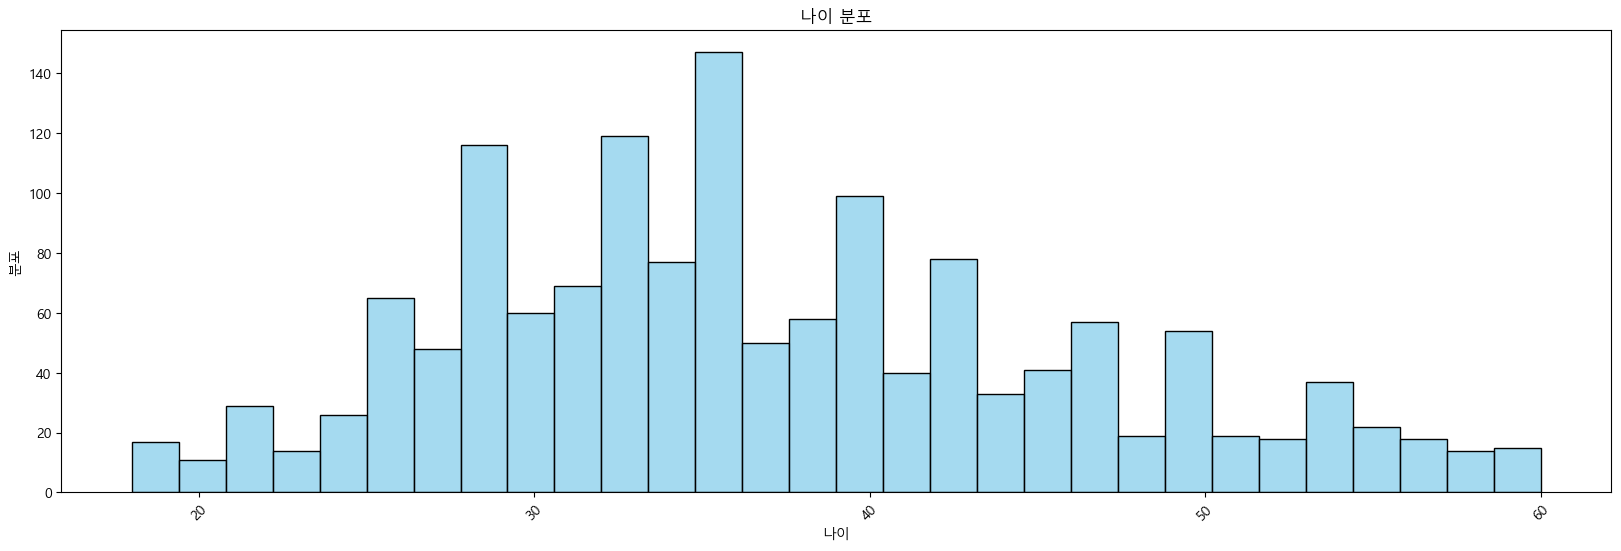

In [6]:
# 데이터 로드
human_df = pd.read_csv('../00_data/Human_Resources.csv', encoding="latin1")
# 폰트 설정
plt.rc('font', family='Malgun Gothic')  # 윈도우 환경
# Quantity 히스토그램 그리기
plt.figure(figsize=(20, 6))

# bins 히스토그램에서 데이터의 분포를 몇 개의 구간으로 나눌지를 지정하는 옵션
# edgecolor='black' 히스토그램 막대의 테두리 색상을 **검정색(black)**으로 설정
sns.histplot(x=human_df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('나이 분포')
plt.xlabel('나이')
plt.xticks(rotation=45)
plt.ylabel('분포')
plt.show()

## Seaborn 스타일 설정
Seaborn은 기본적으로 Matplotlib보다 보기 좋은 스타일을 제공하지만, 더 다양한 스타일을 설정할 수 있다.

In [7]:
# 스타일 설정
# "white": 그리드가 없는 밝은 배경. 심플하고 깔끔한 스타일.
# "dark": 그리드가 없는 어두운 배경. 어두운 테마를 사용할 때 유용하다.
# "whitegrid": 밝은 배경에 그리드가 있는 스타일. 데이터를 직관적으로 시각화할 때 많이 사용. 
# "darkgrid": 어두운 배경에 그리드가 있는 스타일.
# "ticks": 축에 틱 마크가 강조된 스타일. 축의 틱(tick)을 더 명확하게 강조하여 데이터를 시각화할 때 사용.
sns.set_style("whitegrid")  # 스타일 종류: "white", "dark", "whitegrid", "darkgrid", "ticks"


# 팔레트 설정
# "deep": 기본 색상 팔레트로, 선명하고 깊은 색상을 사용.
# "muted": 부드럽고 은은한 색상을 사용하는 팔레트. 시각적으로 덜 자극적이고 고급스러운 느낌을 준다. (코드에서 사용된 팔레트)
# "bright": 밝고 선명한 색상을 사용하는 팔레트. 활기차고 눈에 띄는 그래프를 만들 때 유용한다.
# "pastel": 연한 색상 팔레트로, 시각적으로 부드럽고 차분한 느낌을 준다.
# "dark": 어두운 색상 팔레트로, 어두운 배경과 잘 어울린다.
# "colorblind": 색맹을 고려한 팔레트로, 색상을 구분하기 어려운 사람도 인식할 수 있도록 디자인된 팔레트이다.
sns.set_palette("muted")  # "deep", "muted", "bright", "pastel", "dark", "colorblind"


## Seaborn의 심화 시각화

### Pairplot (페어플롯)
pairplot은 여러 변수 간의 관계를 한 번에 시각화할 수 있는 강력한 도구이다.<br>

- 그래프 설명
    1. Age vs. MonthlyIncome:
    나이가 많을수록 월급이 더 높아지는 경향을 보여주고 있다.<br>
    이직한 직원(파란색)은 다양한 나이대에서 나타나지만, 이직하지 않은 직원(주황색)이 월급이 높아지며 분포되는 경향이 더 강하게 나타난다.

    2. Age vs. TotalWorkingYears:
    나이와 근속 연수 사이에는 긍정적인 상관관계가 있다.<br>
    나이가 많을수록 근속 연수가 증가하는 경향이 명확하게 드러난다.<br>
    이직한 직원(파란색)과 이직하지 않은 직원(주황색) 간의 큰 차이는 없어 보인다.

    3. MonthlyIncome vs. TotalWorkingYears:
    총 근속 연수가 길수록 월급이 높아지는 경향을 보여준다.<br> 
    월급이 낮을 때는 이직 여부와 큰 상관이 없지만, 월급이 높은 직원들 중에서는 이직하지 않은 직원(주황색)이 더 많이 보이는 패턴을 관찰할 수 있다.

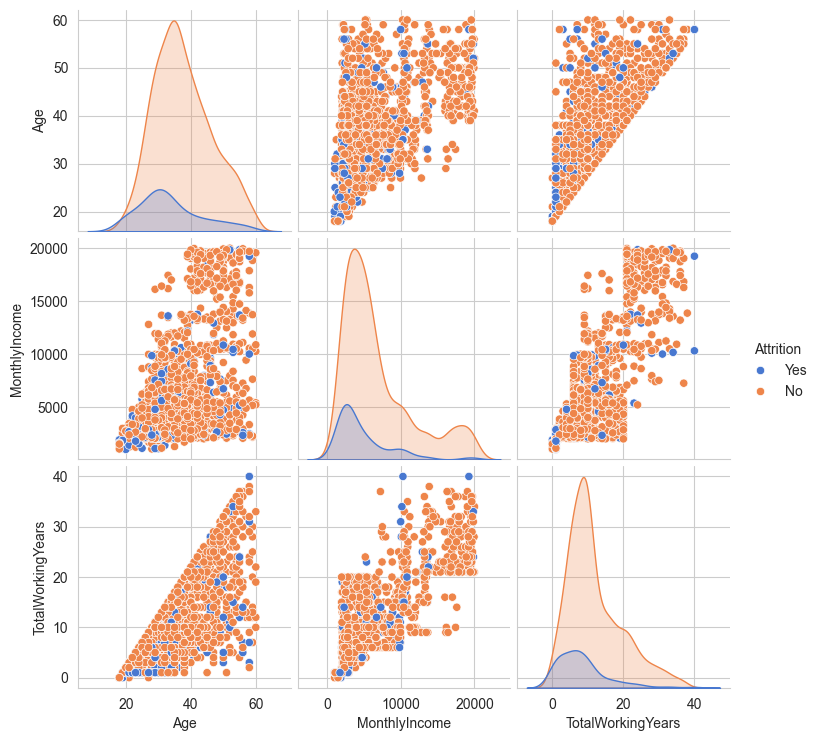

In [8]:
# 데이터 로드
human_df = pd.read_csv('../00_data/Human_Resources.csv', encoding="latin1")

# 필요한 수치형 열만 선택하여 페어플롯을 그리기
# 예를 들어, 'Age', 'MonthlyIncome', 'TotalWorkingYears' 등의 열을 선택
sns.pairplot(human_df, vars=['Age', 'MonthlyIncome', 'TotalWorkingYears'], hue='Attrition')

# 그래프 보여주기
plt.show()




## 히트맵 (Heatmap)
히트맵은 2차원 데이터를 색상으로 표현하는 그래프이다. <br>
데이터의 상관관계나 행렬을 시각화할 때 유용하다.

c:\Users\psc12\miniconda3\envs\dataAnalysis\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.draw()
c:\Users\psc12\miniconda3\envs\dataAnalysis\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


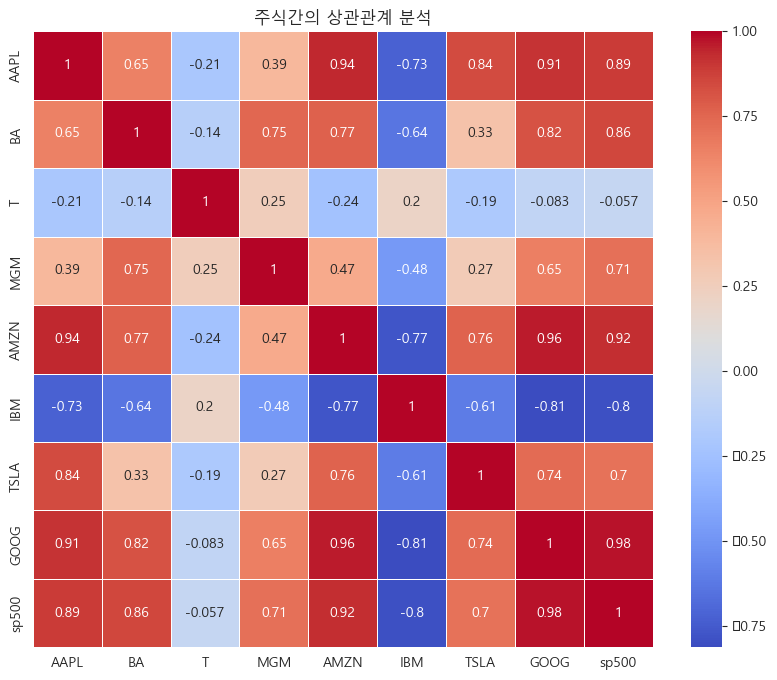

In [9]:

# 데이터 로드
data = pd.read_csv('../00_data/stock_daily_prices.csv')

plt.rc('font', family='Malgun Gothic')  # 윈도우 환경
# 'Date' 컬럼은 상관관계에 필요하지 않으므로 제거
data_without_date = data.drop(columns=['Date'])

# 상관관계 행렬 계산
corr_matrix = data_without_date.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
# annot=True 각 셀에 상관관계 값을 표시합니다.
# cmap='coolwarm': 색상 팔레트를 coolwarm으로 설정하여, 양의 상관관계는 빨간색, 음의 상관관계는 파란색으로 시각화합니다.
# linewidths=0.5: 셀 간의 구분선을 추가합니다.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# 제목 추가
plt.title("주식간의 상관관계 분석")

# 그래프 보여주기
plt.show()

## Boxplot
박스 플롯은 데이터의 분포와 이상치를 시각화 하는데 사용된다.

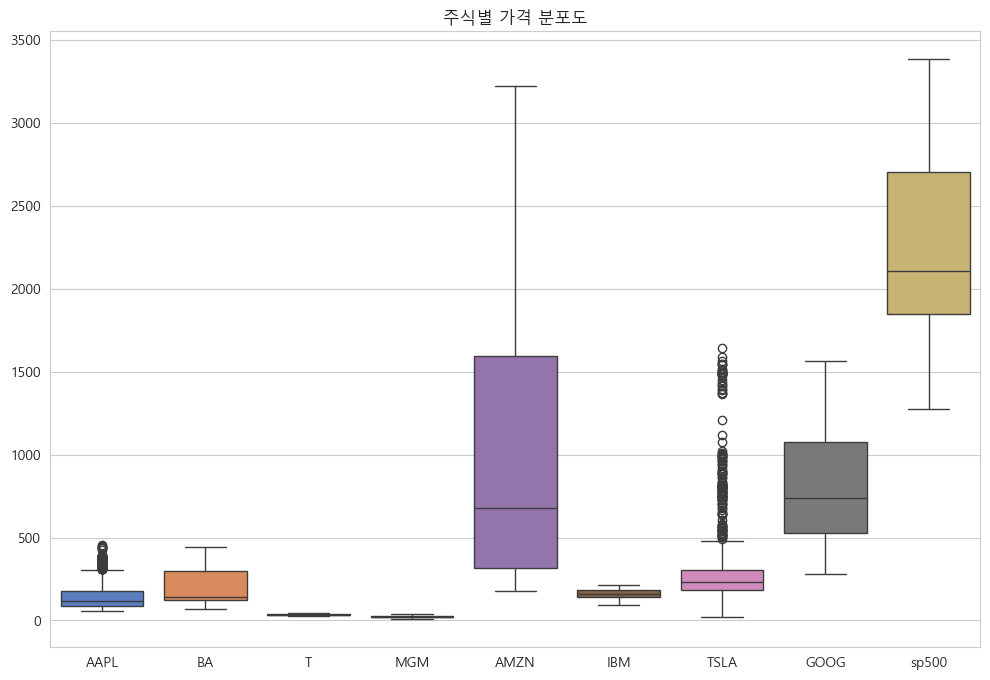

In [10]:

# 데이터 로드
data = pd.read_csv('../00_data/stock_daily_prices.csv')

# 'Date' 컬럼을 제거하고 나머지 수치형 데이터로 박스플롯 생성
data_without_date = data.drop(columns=['Date'])

# 박스플롯 그리기
plt.figure(figsize=(12, 8))
# data=data_without_date로 수치형 데이터를 전달하여, 각 주식(AAPL, BA, T, MGM, AMZN, IBM, TSLA, GOOG, sp500)의 분포를 시각화한다.
# X축에는 data_without_date의 각 컬럼이 자동으로 할당
# Y축에는 각 컬럼의 데이터 값이 나타낸다.
sns.boxplot(data=data_without_date)

# 제목 추가
plt.title("주식별 가격 분포도")

# 그래프 보여주기
plt.show()


### 바이올린 플롯(Violinplot)
바이올린 플롯은 박스 플롯과 비슷하지만, 데이터의 분포를 커널 밀도 추정으로 시각화한다. <br>


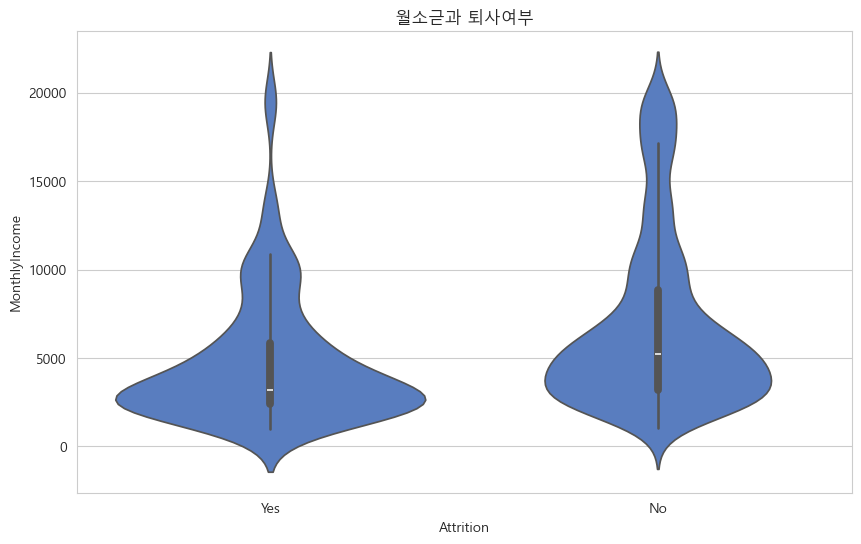

In [11]:

# 데이터 로드
data = pd.read_csv('../00_data/Human_Resources.csv')

# 바이올린 플롯 그리기
plt.figure(figsize=(10, 6))
sns.violinplot(x='Attrition', y='MonthlyIncome', data=data)

# 제목 추가
plt.title("월소귿과 퇴사여부")

# 그래프 보여주기
plt.show()

바이올린 플롯은 **이직한 직원들(Attrition = Yes)**이 주로 낮은 월급을 받고 있으며, **이직하지 않은 직원들(Attrition = No)**은 더 높은 월급을 받는 경우가 많음을 시각적으로 보여줍니다. 이직 여부와 월급 사이에 차이가 있다는 점을 확인할 수 있으며, 이는 높은 월급이 이직을 방지하는 요인일 수 있다는 가설을 뒷받침할 수 있습니다.

## Seaborn 고급

### Regression plot(회귀 플롯)
두 변수 간의 관계를 시각화하고, 그 관계를 기반으로 선형 회귀선을 표시하는 그래프이다.<br>
주어진 데이터에서 두 수치형 변수 간의 관계를 분석하는데 유용하다.

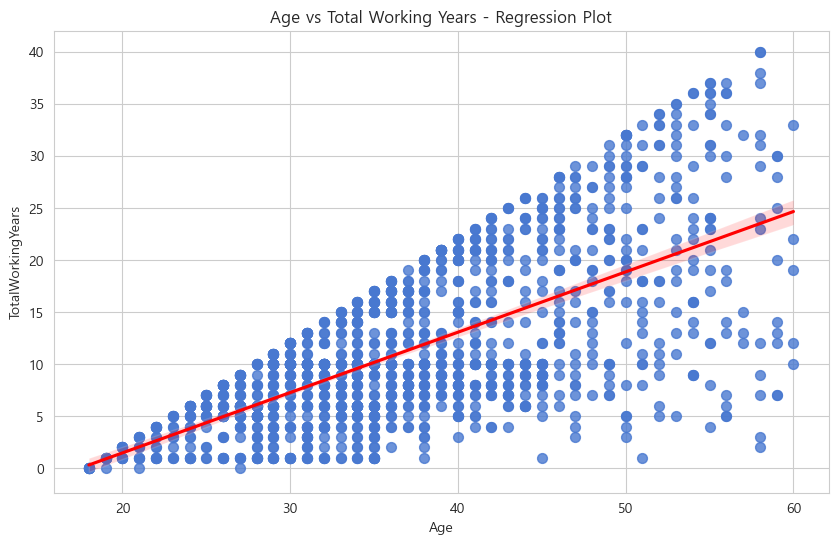

In [12]:
# 나이가 많을수록 근속 연수가 길어지는 경향을 시각화

# 데이터 로드
data = pd.read_csv('../00_data/Human_Resources.csv')

# 회귀 플롯 그리기 (Age vs TotalWorkingYears)
plt.figure(figsize=(10, 6))

# scatter_kws={'s':50}: 산점도에서 점의 크기를 설정하는 옵션
# line_kws={"color":"red"}: 회귀선의 색상을 빨간색으로 지정합니다.
sns.regplot(x='Age', y='TotalWorkingYears', data=data, scatter_kws={'s':50}, line_kws={"color":"red"})

# 제목 추가
plt.title("Age vs Total Working Years - Regression Plot")

# 그래프 보여주기
plt.show()

# 나이와 총 근속 연수 간의 양의 상관관계를 시각적으로 확인할 수 있다

### 다중 그래프
Seaborn에서 제공하는 기능으로, 데이터를 여러 하위 그래프(페이싯)로 나누어 시각화하는 데 사용된다.

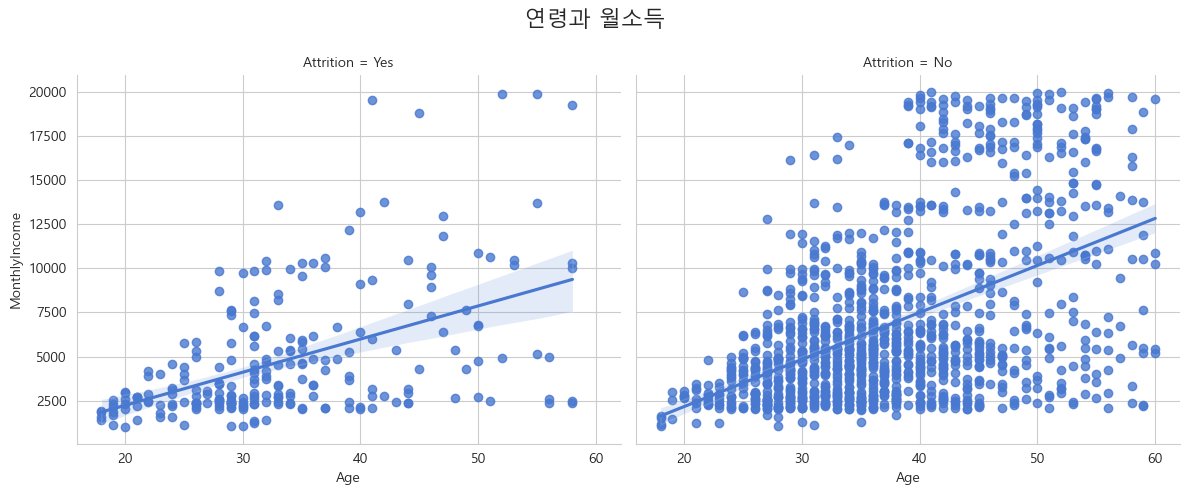

In [13]:

# 데이터 로드
human_df = pd.read_csv('../00_data/Human_Resources.csv')

# FacetGrid 설정: 이직 여부(Attrition)에 따라 나누기
# col = Attrition(이직 여부)를 기준으로 데이터를 나누어 각각의 하위 그래프를 만듭
# height=5: 각 하위 그래프의 높이를 설정합니다.
# aspect=1.2: 하위 그래프의 가로와 세로 비율을 설정합니다.
g = sns.FacetGrid(human_df, col="Attrition", height=5, aspect=1.2)

# 각 Facet에 대해 회귀 플롯 그리기
# g.map()은 FacetGrid에 플롯을 그리는 함수이다.
# **sns.regplot**을 사용하여 **나이(Age)**와 월급(MonthlyIncome) 간의 회귀 플롯을 그린다.
g.map(sns.regplot, "Age", "MonthlyIncome")

# g.fig.suptitle()로 전체 제목을 추가
g.fig.suptitle("연령과 월소득", fontsize=16)
plt.subplots_adjust(top=0.85)  # 제목과 그래프 사이의 간격 조정

# 그래프 보여주기
plt.show()

### Jointplot (조인트 플롯)
jointplot은 두 변수의 관계를 시각화하고, 각 변수의 분포도 함께 보여줍니다.

<Figure size 1000x600 with 0 Axes>

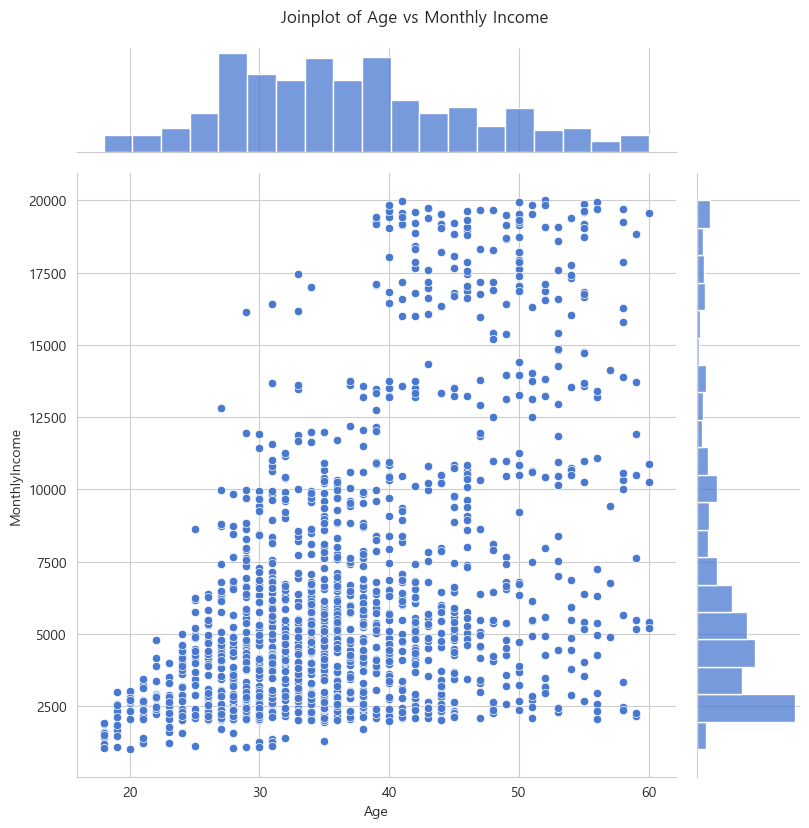

In [14]:
# 데이터 로드
data = pd.read_csv('../00_data/Human_Resources.csv')

# 조인플롯 그리기 (Age vs MonthlyIncome)
plt.figure(figsize=(10, 6))
# x='Age': X축에 표시될 변수를 지정합니다. 여기서는 **나이(Age)**를 사용
# y='MonthlyIncome': Y축에 표시될 변수를 지정합니다. 여기서는 **월급(MonthlyIncome)**을 사용
# kind='scatter': 산점도로 데이터 포인트를 표시
# height=8: 플롯의 크기를 지정합니다.

sns.jointplot(x='Age', y='MonthlyIncome', data=data, kind='scatter', height=8)

# 제목 추가
plt.suptitle("Joinplot of Age vs Monthly Income", y=1.03)  # 제목 추가 및 위치 조정
plt.show()
